<h1>Imports</h1>

In [ ]:
import PIL
import cv2
import os
import numpy as np
import psycopg2
import seaborn as sns
from psycopg2 import Error
from matplotlib import image
from matplotlib import pyplot
from PIL import Image

<h1>Script de comparação</h1>

In [ ]:
#Não pode ser usado em aplicações de tempo real, pois não há espaço para margens de erro

original = cv2.imread("imagens/Impressao_digital.jpg")
duplicate = cv2.imread("imagens/vermelho.png")# 1) Check if 2 images are equals
if original.shape == duplicate.shape:
  print("The images have same size and channels")
  difference = cv2.subtract(original, duplicate)
  b, g, r = cv2.split(difference)
#countNonZero percorre toda a matriz computando o número de elementos diferentes de zero
  if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")
    
else:
  print(duplicate)
  print("the images are not equal")

<h2> Vendo se as imagens são compatível</h2>

In [ ]:
minhaImagem1 = "imagens/Impressao_digital.jpg"
minhaImagem2 = "imagens/Impressao_digital.jpg"
Mimg1 = cv2.imread(minhaImagem2)
Mimg2 = cv2.imread(minhaImagem2)
    
def _checagem(imagem1, imagem2):
    if imagem1.shape != imagem2.shape:
        return False
    elif imagem1.size != imagem2.size:
        return False
    return True

_checagem(Mimg1,Mimg2)

<h2>Comparando a imagem</h2>

In [ ]:
#podemos fazer um loop e comparar todas as imgs, come mais processamento mas é mais simples e certeiro
minhaImagem1 = "imagens/vermelho.png"
minhaImagem2 = "imagens/imagemCinza.png"
Mimg1 = cv2.imread(minhaImagem1)
Mimg2 = cv2.imread(minhaImagem2)
def _comparacao(imagem1, imagem2):
    diferenca = cv2.subtract(imagem1, imagem2)
    b, g, r = cv2.split(diferenca)
    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("imagens iguais")
        return True
    return False

_comparacao(Mimg1,Mimg2)

<h2> Cadastrando imagem </h2>

In [ ]:

def _inserir(categoria,digital, nomeDaPessoa):
    try:
    
        connection = psycopg2.connect(user="george",
                                    password="1234",
                                    host="127.0.0.1",
                                    port="5432",
                                    database="pythondb")

        cursor = connection.cursor()                                            
        insertQuery = "INSERT INTO criminoso (nome,categoria,digital) VALUES ('"+nomeDaPessoa+"','"+categoria+"','"+digital+"')"
        cursor.execute(insertQuery)
        connection.commit()
    except (Exception, Error) as error:
        print("Error while connecting to PostgreSQL", error)

_inserir('queima1','bla23bla2','a6dacioso')

<h1> Procura por regiões da digital</h1>

<h2>Arcos Angulares</h2>

In [ ]:
# os.mkdir("imagens_alteradas/kkk")
#os.rmdir("imagens_alteradas/kkk")

# img = cv2.imread("imagens/Impressao_digital.jpg")
# crop_img = img[400:600, 220:370]
# crop = np.asarray(crop_img)
class ArcosAngulares():
    def __init__(self, fonte,nome):
        self.fonte = fonte
        self.nome = nome
            
    def getAngular1(fonte,nome):
        img = Image.open("imagens/"+fonte)
        pixels = img.crop((260,450,340,550))
        identificacao= "numeroDeUsersDoDB+1"
        pixels.save("imagens_alteradas/arcoAngular/angular1"+nome+".png")
        pixels = np.asarray(pixels)
        pixels = pixels.astype("float32")
        pixels /= pixels.max()
        return pixels

    def getAngular2(fonte,nome):
        img = Image.open("imagens/"+fonte)
        pixels = img.crop((260,250,340,350))
        identificacao= "numeroDeUsersDoDB+1"
        pixels.save("imagens_alteradas/arcoAngular/angular2"+nome+".png")
        pixels = np.asarray(pixels)
        pixels = pixels.astype("float32")
        pixels /= pixels.max()
        return pixels

    def getNome(self):
        return self.nome

    def setNome(self,NovoNome):
        self.nome = NovoNome
    
    def getFonte(self):
        return self.fonte
    
    def setFonte(self, NovaFonte):
        self.fonte = NovaFonte
    
# getArco2("Impressao_digital.jpg","fabio")
    # pyplot.imshow(pixels, cmap="binary")




<h2>Arcos verstícios</h2>

In [ ]:
def getVerticilo1(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((200,200,340,340))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/arcoVerticilo/verticilo1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
   # pyplot.imshow(pixels, cmap="binary")
    return pixels

def getVerticilo2(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((400,500,500,650))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/arcoVerticilo/verticilo1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    #pyplot.imshow(pixels, cmap="binary")
    return pixels

def getVerticilo3(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((150,500,250,650))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/arcoVerticilo/verticilo1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    pyplot.imshow(img, cmap="binary")
   # return pixels

getVerticilo3("Impressao_digital.jpg","fausto2")

<h1>Presilha direita </h1>

In [ ]:
def getPresilha1(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((300,480,450,580))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/presilhaDireita/presilha1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    #pyplot.imshow(pixels, cmap="binary")
    return pixels

def getPresilha2(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((150,200,250,300))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/presilhaDireita/presilha1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    #pyplot.imshow(pixels, cmap="binary")
    return pixels


getPresilha2("Impressao_digital.jpg","bystander2")

<h1>Presilha esquerda</h1>

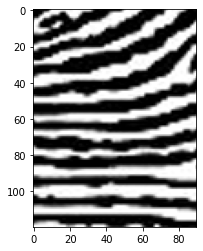

In [47]:

def getPresilhaE1(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((300,200,450,350))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/presilhaEsquerda/presilha1"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    pyplot.imshow(pixels, cmap="binary")
    #return pixels

def getPresilhaE2(fonte,nome):
    img = Image.open("imagens/"+fonte)
    pixels = img.crop((180,580,270,700))
    identificacao= "numeroDeUsersDoDB+1"
    pixels.save("imagens_alteradas/presilhaEsquerda/presilha2"+nome+".png")
    pixels = np.asarray(pixels)
    pixels = pixels.astype("float32")
    pixels /= pixels.max()
    pyplot.imshow(pixels, cmap="binary")
    #return pixels
getPresilhaE2("Impressao_digital.jpg","bystander1")